# **1. Importações**

## Importação dos Avaliadores

In [12]:
#%pip install autorank

In [13]:
from utils.FileManager import FileManager
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from autorank import autorank, plot_stats, create_report

In [14]:
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from experimento.ExperimentoDrift import Experimento

## Frameworks

In [15]:
# importando o framework
from frameLiedson.FrameLiedson import FrameLiedson
from frameGabriel.SmartWindow import SmartWindow

## Importação dos Detectores

In [16]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

## Importação dos Regressores Off-line

In [17]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KneighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

## Importação dos Regressores On-line

In [18]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo
from regressores.modelosOnline.OSELM import OSELMModelo

# **2. Definindo os Dados e Parâmetros**

## Dados

In [19]:
# Lista de séries temporais
series = [
    "AAPL",
    "B3SA3.SA",
    "IXIC",
    "DJI",
    "GSPC",
    "BVSP",
    "USDBRLX"
]

## Parâmetros

In [20]:
# Parâmetros do experimento
tamanho_batch = 300
lags = 10
repeticoes = 10  # Número de execuções para cada modelo-série

# **3. Definindo os Modelos e Avaliadores**

modelos = [
    {
        "nome": "LR + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": HDDM_ADetector
    },
    #{
    #    "nome": "KNN + HDDMA",
    #    "avaliador": AvaliadorBatch(),
    #    "modelo": KNNRegressorOnlineModelo,
    #    "detector": HDDM_ADetector
    #},   
    {
        "nome": "MLP + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "Lasso + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": HDDM_ADetector
    },    
    {
        "nome": "RF + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "Ridge + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "SVR + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": HDDM_ADetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "Ridge + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "Lasso + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },

    {
        "nome": "LR + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "KNN + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": KSWINDetector
    },   
    {
        "nome": "MLP + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Lasso + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },    
    {
        "nome": "RF + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Ridge + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "SVR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": KSWINDetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "Ridge + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "Ridge + ADWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": ADWINDetector
    },
    
    {
        "nome": "Ridge + DDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": DDMDetector
    },
     
    {
        "nome": "Ridge + EDDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": EDDMDetector
    },
     
     
     {
        "nome": "Ridge + FHDDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": FHDDMDetector
    },
     
    {
        "nome": "Ridge + HDDM_ADetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_ADetector
    },
    
    {
        "nome": "Ridge + PageHinkleyDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": PageHinkleyDetector
    },
    
    {
        "nome": "Ridge + HDDM_WDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_WDetector
    },

    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

In [21]:
modelos = [
    
    
    {
        "nome": "Liedson",
        "avaliador": FrameLiedson(BayesianLinearRegressionModelo, KSWINDetector, 10, tamanho_batch),
        "modelo": BayesianLinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Gabriel",
        "avaliador": SmartWindow(LinearRegressionModelo, KSWINDetector, 0.004),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    
    
    
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "KNN + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": KSWINDetector
    },   
    {
        "nome": "MLP + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": KSWINDetector
    },  

    {
        "nome": "SVR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": KSWINDetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    }, 
    {
        "nome": "OS-ELM",
        "avaliador": AvaliadorPassivo(),
        "modelo": OSELMModelo,
        "detector": None  # Passivo, não usa detector
    },  
]

# **4. Executando o Experimento**

In [22]:
# Criando e executando o experimento
experimento = Experimento(
    series=series,
    modelos=modelos,
    tamanho_batch=tamanho_batch,
    lags=lags,
    repeticoes=repeticoes
)

resultados = experimento.executar()

Executando Liedson na série: AAPL
Executando Gabriel na série: AAPL
Executando LR + KSWIN na série: AAPL
Executando KNN + KSWIN na série: AAPL
Executando MLP + KSWIN na série: AAPL
Executando SVR + KSWIN na série: AAPL
Executando BayesianLinear na série: AAPL
Executando HoeffdingTree na série: AAPL
Executando KNNRegressorOnline na série: AAPL
Executando LinearRegressionOnline na série: AAPL
Executando OS-ELM na série: AAPL
Executando Liedson na série: B3SA3.SA
Executando Gabriel na série: B3SA3.SA
Executando LR + KSWIN na série: B3SA3.SA
Executando KNN + KSWIN na série: B3SA3.SA
Executando MLP + KSWIN na série: B3SA3.SA
Executando SVR + KSWIN na série: B3SA3.SA
Executando BayesianLinear na série: B3SA3.SA
Executando HoeffdingTree na série: B3SA3.SA
Executando KNNRegressorOnline na série: B3SA3.SA
Executando LinearRegressionOnline na série: B3SA3.SA
Executando OS-ELM na série: B3SA3.SA
Executando Liedson na série: IXIC
Executando Gabriel na série: IXIC
Executando LR + KSWIN na série: IX

In [23]:
# salvando os resultados
arquivo_salvamento = "Experimento_frameworks.csv"
FileManager.salvar_resultados(resultados, arquivo_salvamento)


Resultados salvos em: Experimento_frameworks.csv


'Experimento_frameworks.csv'

# **5. Análise Estatística dos Resultados**

## Leitura dos Resultados

In [24]:
# 1. Ler o arquivo CSV
df = pd.read_csv(arquivo_salvamento)

## Tabelas de Resultados

In [25]:
# 3. Agrupar por modelo e calcular estatísticas
summary = df.groupby(['serie', 'modelo']).agg(
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    qtd_deteccoes_mean=('qtd_deteccoes', 'mean'),
    qtd_deteccoes_std=('qtd_deteccoes', 'std')
).reset_index()

### Média do MAE

In [26]:
# Tabela para a média do MAE
mae_mean_table = summary.pivot(index='serie', columns='modelo', values='mae_mean')
mae_mean_table

modelo,BayesianLinear,Gabriel,HoeffdingTree,KNN + KSWIN,KNNRegressorOnline,LR + KSWIN,Liedson,LinearRegressionOnline,MLP + KSWIN,OS-ELM,SVR + KSWIN
serie,,,,,,,,,,,
AAPL,0.007968,0.006919,0.083247,0.072021,0.011132,0.006915,0.007981,1.202358e+10,0.025099,0.012473,0.017238
B3SA3.SA,0.029469,0.036824,0.038586,0.242802,0.046939,0.030307,0.029485,3.858648e-02,0.110761,0.055756,0.041523
BVSP,0.017539,0.016798,0.024016,0.106489,0.023817,0.016258,0.017586,2.259444e-02,0.043189,0.018554,0.031447
DJI,0.013574,0.013069,0.017122,0.106824,0.018260,0.013729,0.013596,1.685547e-02,0.039644,0.017054,0.034512
GSPC,0.005660,0.007133,0.120804,0.047274,0.007657,0.005446,0.005670,1.788413e+10,0.020241,0.010631,0.018422
IXIC,0.008735,0.008839,0.051417,0.068702,0.011879,0.008005,0.008755,9.147726e+09,0.030811,0.016583,0.026615
USDBRLX,0.019844,0.020343,0.026357,0.142506,0.028492,0.023358,0.019901,2.635711e-02,0.065068,0.026743,0.025568


### Desvio do MAE

In [27]:
# Tabela para o desvio padrão do MAE
mae_std_table = summary.pivot(index='serie', columns='modelo', values='mae_std')
mae_std_table

modelo,BayesianLinear,Gabriel,HoeffdingTree,KNN + KSWIN,KNNRegressorOnline,LR + KSWIN,Liedson,LinearRegressionOnline,MLP + KSWIN,OS-ELM,SVR + KSWIN
serie,,,,,,,,,,,
AAPL,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.0,0.001718,0.0,0.0
B3SA3.SA,0.0,0.0,0.0,0.0,0.0,0.0,0.000073,0.0,0.026547,0.0,0.0
BVSP,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.0,0.005359,0.0,0.0
DJI,0.0,0.0,0.0,0.0,0.0,0.0,0.000008,0.0,0.003750,0.0,0.0
GSPC,0.0,0.0,0.0,0.0,0.0,0.0,0.000003,0.0,0.001546,0.0,0.0
IXIC,0.0,0.0,0.0,0.0,0.0,0.0,0.000010,0.0,0.003752,0.0,0.0
USDBRLX,0.0,0.0,0.0,0.0,0.0,0.0,0.000015,0.0,0.010114,0.0,0.0


### Média Detecções

In [28]:
# Tabela para a média das detecções
deteccoes_mean_table = summary.pivot(index='serie', columns='modelo', values='qtd_deteccoes_mean')
deteccoes_mean_table

modelo,BayesianLinear,Gabriel,HoeffdingTree,KNN + KSWIN,KNNRegressorOnline,LR + KSWIN,Liedson,LinearRegressionOnline,MLP + KSWIN,OS-ELM,SVR + KSWIN
serie,,,,,,,,,,,
AAPL,NaN,19.0,NaN,27.0,NaN,19.0,24.2,NaN,26.7,NaN,26.0
B3SA3.SA,NaN,5.0,NaN,10.0,NaN,6.0,7.2,NaN,8.3,NaN,9.0
BVSP,NaN,13.0,NaN,19.0,NaN,12.0,12.8,NaN,17.0,NaN,16.0
DJI,NaN,13.0,NaN,20.0,NaN,14.0,16.7,NaN,18.8,NaN,19.0
GSPC,NaN,31.0,NaN,59.0,NaN,40.0,50.3,NaN,58.1,NaN,58.0
IXIC,NaN,21.0,NaN,33.0,NaN,21.0,28.0,NaN,32.5,NaN,32.0
USDBRLX,NaN,9.0,NaN,11.0,NaN,10.0,9.0,NaN,10.9,NaN,9.0


## Teste Estatístico

In [29]:
# 4. Preparar dados para autorank (uma linha por repetição, colunas por modelo)
df_mae = df.pivot_table(index=["serie", "repeticao"], columns="modelo", values="mae")
# Remover qualquer valor NaN para análise (caso haja)
df_mae = df_mae.dropna()
# Tabela de desempenho
df_mae

modelo             BayesianLinear   Gabriel  HoeffdingTree  KNN + KSWIN  \
serie   repeticao                                                         
AAPL    1                0.007968  0.006919       0.083247     0.072021   
        2                0.007968  0.006919       0.083247     0.072021   
        3                0.007968  0.006919       0.083247     0.072021   
        4                0.007968  0.006919       0.083247     0.072021   
        5                0.007968  0.006919       0.083247     0.072021   
...                           ...       ...            ...          ...   
USDBRLX 6                0.019844  0.020343       0.026357     0.142506   
        7                0.019844  0.020343       0.026357     0.142506   
        8                0.019844  0.020343       0.026357     0.142506   
        9                0.019844  0.020343       0.026357     0.142506   
        10               0.019844  0.020343       0.026357     0.142506   

modelo             KNNRegressorOnline  LR + KSWIN   Liedson  \
serie   repeticao                                             
AAPL    1                    0.011132    0.006915  0.007982   
        2                    0.011132    0.006915  0.007980   
        3                    0.011132    0.006915  0.007970   
        4                    0.011132    0.006915  0.007972   
        5                    0.011132    0.006915  0.007980   
...                               ...         ...       ...   
USDBRLX 6                    0.028492    0.023358  0.019884   
        7                    0.028492    0.023358  0.019921   
        8                    0.028492    0.023358  0.019902   
        9                    0.028492    0.023358  0.019886   
        10                   0.028492    0.023358  0.019926   

modelo             LinearRegressionOnline  MLP + KSWIN    OS-ELM  SVR + KSWIN  
serie   repeticao                                                              
AAPL    1                    1.202358e+10     0.023578  0.012473     0.017238  
        2                    1.202358e+10     0.023810  0.012473     0.017238  
        3                    1.202358e+10     0.024956  0.012473     0.017238  
        4                    1.202358e+10     0.025687  0.012473     0.017238  
        5                    1.202358e+10     0.025123  0.012473     0.017238  
...                                   ...          ...       ...          ...  
USDBRLX 6                    2.635711e-02     0.066208  0.026743     0.025568  
        7                    2.635711e-02     0.071468  0.026743     0.025568  
        8                    2.635711e-02     0.060024  0.026743     0.025568  
        9                    2.635711e-02     0.061256  0.026743     0.025568  
        10                   2.635711e-02     0.057828  0.026743     0.025568  

[70 rows x 11 columns]

In [30]:
# computing the most appropriate statistical test
results = autorank(-df_mae)
# printing the report
create_report(results)

The statistical analysis was conducted for 11 populations with 70 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations KNN + KSWIN (p=0.000), MLP + KSWIN (p=0.000), HoeffdingTree (p=0.000), LinearRegressionOnline (p=0.000), SVR + KSWIN (p=0.000), KNNRegressorOnline (p=0.000), OS-ELM (p=0.000), Liedson (p=0.000), Gabriel (p=0.000), LR + KSWIN (p=0.000), and BayesianLinear (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the sam

<Axes: >

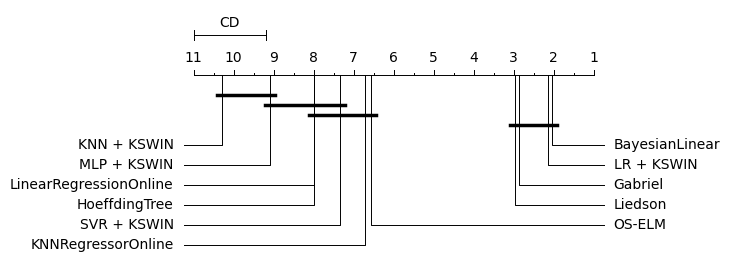

In [31]:
# plotting the results
plot_stats(results, allow_insignificant=True)